In [1]:
from geneticalgorithm1 import *

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

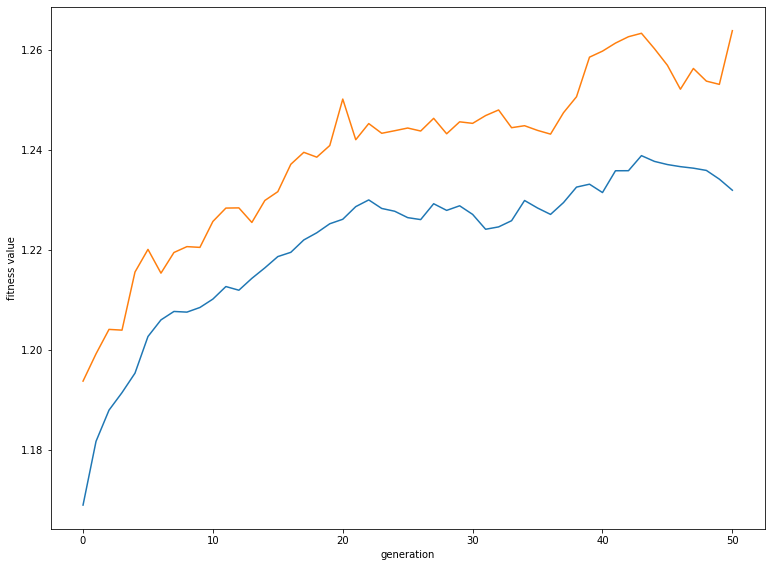

In [2]:
number_generations = 50
population_size = 100
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-3/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-3.png')

In [3]:
chrom_best

array([[10464., 13522., 14955., ..., 28102., 22219., 26102.],
       [14378., 11438., 26496., ..., 23347.,  9886., 28391.],
       [16873., 27646., 23256., ...,  3070., 26359., 23137.],
       ...,
       [15336., 15515., 15927., ..., 24771., 27655., 15348.],
       [13534., 14779., 15220., ..., 17826., 27655., 26350.],
       [13534., 14779., 15220., ..., 17021., 17034., 17144.]])

In [20]:
df = pandas.read_csv('data/processed/ga-results-3/gen-50')
df

,Unnamed: 0,flag,lat_index,lon_index
0,13534,r,97,174
1,14779,r,111,45
2,15220,r,115,188
3,15348,r,116,209
4,15538,r,118,204
5,15927,r,121,208
6,16221,r,123,210
7,16223,r,123,212
8,15251,r,115,208
9,17207,r,129,221


In [13]:
uk = r_pd[0,:,:]

for j in range(len(latitude)):
    for k in range(len(longitude)):
        if np.isnan(uk[j,k]) == True:
            pass
        else:
            uk[j,k] = 0

In [14]:
for j in range(len(df)):
    uk[df.loc[j,('lat_index')],df.loc[j,('lon_index')]] = 10
    

In [15]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



# placement_xr.to_netcdf(path=f'data/processed/ga-3.nc')

In [21]:
ds = xr.open_dataset('data/processed/ga-3.nc')

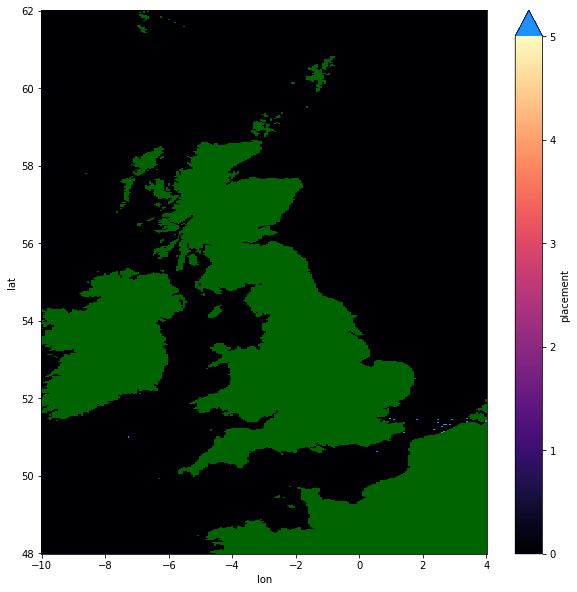

In [22]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

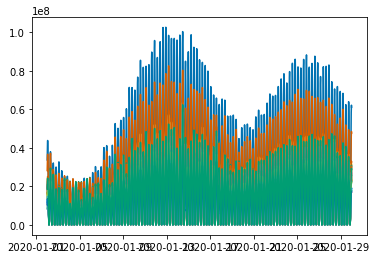

In [23]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = r_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    

# plt.legend()
    

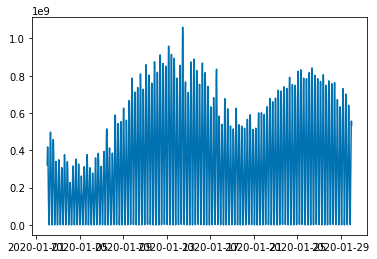

In [24]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.ylim([0,5e8])

In [25]:
### new figure of merit

sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
(sol_mean**2)/rmsd

407409485.0661322

In [25]:
f_best

array([1.1937138 , 1.19917549, 1.20406556, 1.20391819, 1.21554343,
       1.22008127, 1.21532262, 1.21945675, 1.22063094, 1.2204809 ,
       1.22567275, 1.22834701, 1.22838566, 1.22547041, 1.22986776,
       1.23163325, 1.23711386, 1.23950338, 1.23853794, 1.24086691,
       1.25016363, 1.24202751, 1.24525962, 1.24331473, 1.24382952,
       1.24436916, 1.24376813, 1.24630719, 1.24321454, 1.24560913,
       1.24530428, 1.24686103, 1.24798518, 1.24443509, 1.24483099,
       1.24389491, 1.24314796, 1.24744223, 1.25062846, 1.25855081,
       1.25975848, 1.26136647, 1.26264225, 1.26333135, 1.26025254,
       1.2569212 , 1.25213484, 1.25628794, 1.25375767, 1.2531071 ,
       1.26385494])

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

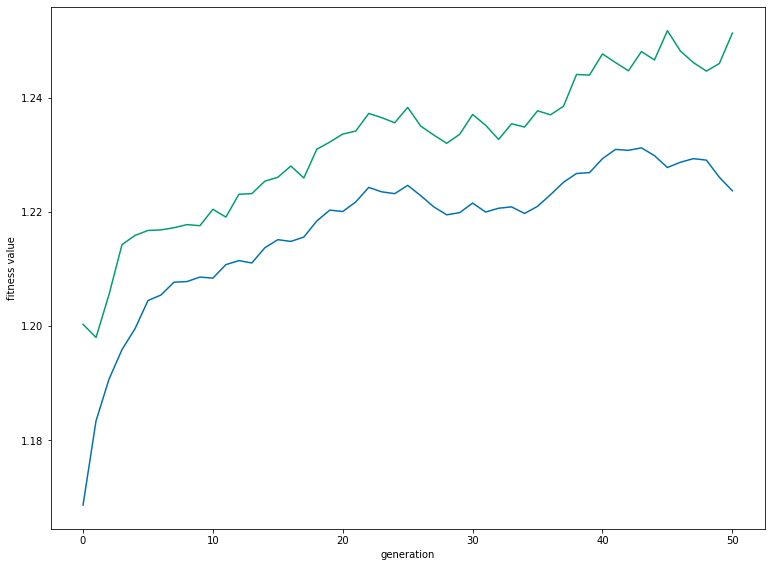

In [26]:
number_generations = 50
population_size = 100
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-4/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-4.png')

In [27]:
chrom_best

array([[26057., 26858.,  7526., ..., 24634.,  5198., 18086.],
       [15262., 10620., 21906., ..., 23173., 17941., 26612.],
       [17299., 15644., 28898., ..., 23173., 17941., 26612.],
       ...,
       [14297., 14466., 14838., ..., 17302., 24924., 15330.],
       [17941., 14297., 14466., ..., 17041., 17302., 24924.],
       [15131., 25141., 17634., ..., 16879., 17041., 17302.]])

In [29]:
df2 = pandas.read_csv('data/processed/ga-results-4/gen-50.csv')
df2

,Unnamed: 0,flag,lat_index,lon_index
0,15131,r,114,192
1,25141,r,231,87
2,17634,r,133,65
3,25323,r,234,84
4,16674,r,126,199
5,15250,r,115,207
6,15330,r,116,196
7,15347,r,116,208
8,15660,r,120,41
9,22862,r,209,79


In [30]:
uk = r_pd[0,:,:]

for j in range(len(latitude)):
    for k in range(len(longitude)):
        if np.isnan(uk[j,k]) == True:
            pass
        else:
            uk[j,k] = 0

In [31]:
for j in range(len(df2)):
    uk[df2.loc[j,('lat_index')],df2.loc[j,('lon_index')]] = 10
    

In [32]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



# placement_xr.to_netcdf(path=f'data/processed/ga-4.nc')

In [33]:
ds = xr.open_dataset('data/processed/ga-4.nc')

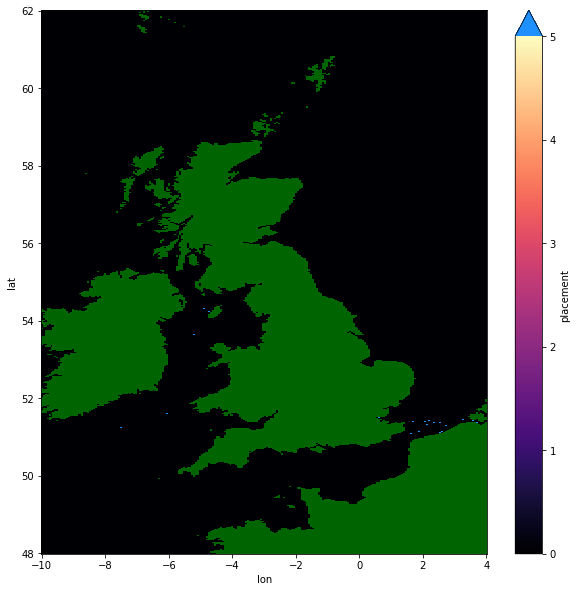

In [41]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

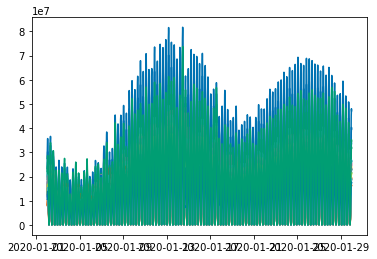

In [35]:
sol_power = 0
plt.figure()
for i in range(len(df2)):
    curve = r_power[:,df2.loc[i,('lat_index')],df2.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df2.iloc[i,0]}')
    

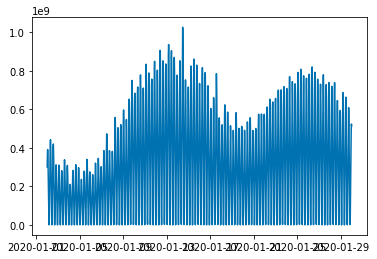

In [36]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.ylim([0,5e8])

In [37]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
sol_mean/rmsd

1.2513548744748324

In [38]:
f_best

array([1.2003359 , 1.19802656, 1.20553988, 1.2142958 , 1.21590661,
       1.21677516, 1.21688177, 1.21725349, 1.2178053 , 1.21761382,
       1.22048608, 1.21911918, 1.2231199 , 1.22323063, 1.22541821,
       1.22609945, 1.2280672 , 1.22597214, 1.23101071, 1.23226417,
       1.23367106, 1.23419162, 1.23728133, 1.23654366, 1.23564855,
       1.23834074, 1.23507648, 1.23350848, 1.23205078, 1.23361524,
       1.23710111, 1.23521571, 1.23272905, 1.23547093, 1.23489774,
       1.23774444, 1.2370454 , 1.23854489, 1.24410581, 1.24400006,
       1.24770681, 1.24619745, 1.24475419, 1.24813165, 1.24664784,
       1.25178553, 1.24821203, 1.24619548, 1.24469898, 1.24603419,
       1.25135487])

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

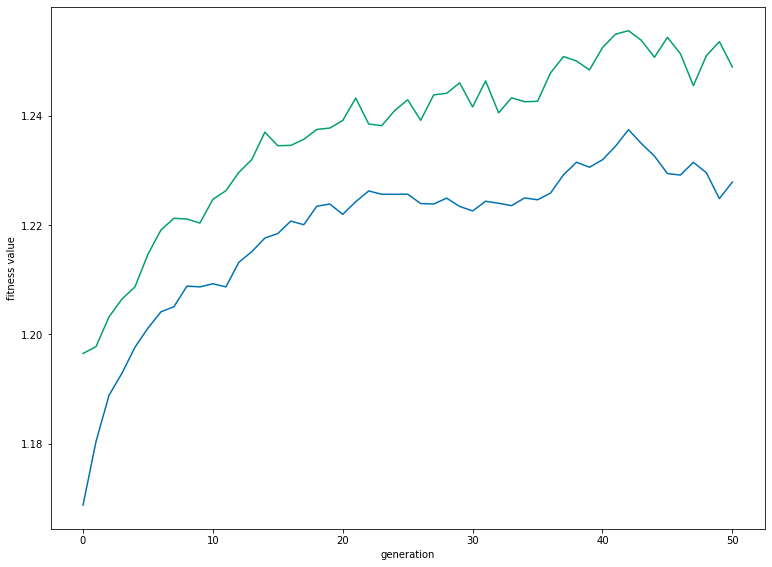

In [42]:
number_generations = 50
population_size = 100
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-5/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-5.png')

In [43]:
chrom_best

array([[24707.,  7120., 16068., ...,  2271., 11613., 16694.],
       [13944., 13963., 23262., ..., 15946., 10102.,  8568.],
       [15840., 10253., 24985., ..., 26390., 17573.,  4590.],
       ...,
       [15337., 16378., 16549., ..., 26594., 26958., 13027.],
       [15932., 16517., 16549., ..., 23454., 25203., 26958.],
       [ 7537., 15240., 15349., ..., 23651.,  8808., 24040.]])

In [44]:
df = pandas.read_csv('data/processed/ga-results-5/gen-50.csv')
df

,Unnamed: 0,flag,lat_index,lon_index
0,7537,r,65,72
1,15240,r,115,199
2,15349,r,117,39
3,15794,r,121,41
4,15899,r,121,191
5,16068,r,122,206
6,16349,r,124,196
7,16378,r,124,212
8,16406,r,125,61
9,16549,r,125,228


In [45]:
uk = r_pd[0,:,:]

for j in range(len(latitude)):
    for k in range(len(longitude)):
        if np.isnan(uk[j,k]) == True:
            pass
        else:
            uk[j,k] = 0
            
            
            
for j in range(len(df)):
    uk[df.loc[j,('lat_index')],df.loc[j,('lon_index')]] = 10
    

In [46]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-5.nc')

In [47]:
ds = xr.open_dataset('data/processed/ga-5.nc')

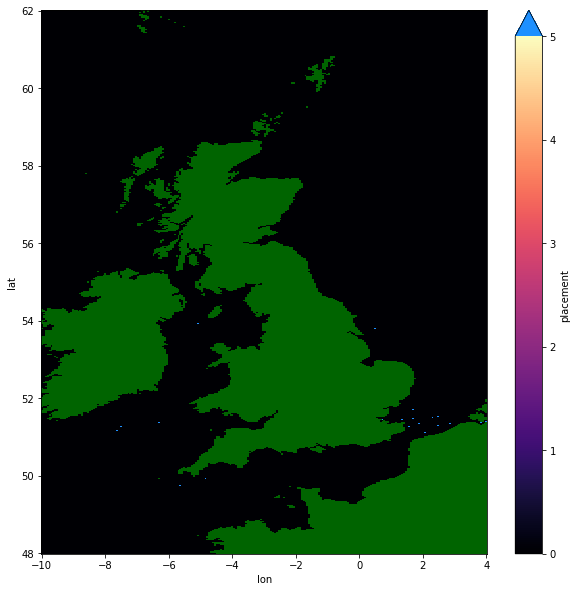

In [48]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

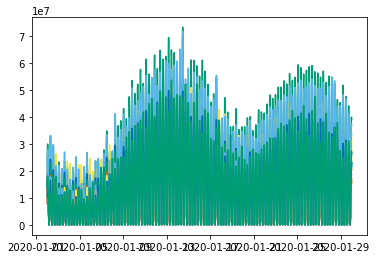

In [49]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = r_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    

# plt.legend()
    

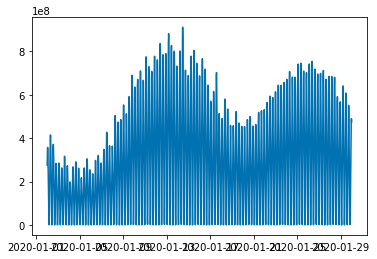

In [50]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.ylim([0,5e8])

In [51]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
sol_mean/rmsd

1.2489993637597891

In [52]:
f_best

array([1.19651843, 1.19776499, 1.20321398, 1.20649056, 1.20872082,
       1.21470415, 1.21913344, 1.22127708, 1.22114519, 1.22039968,
       1.22475748, 1.22632662, 1.22969565, 1.23205582, 1.23705981,
       1.23457046, 1.23463865, 1.23574064, 1.23755145, 1.23781013,
       1.23920116, 1.24329831, 1.238546  , 1.23824903, 1.24102156,
       1.24299034, 1.23921846, 1.24387973, 1.24417581, 1.24608782,
       1.24168403, 1.24644723, 1.24059284, 1.24335289, 1.24262856,
       1.24270802, 1.24791294, 1.25090351, 1.25009637, 1.24845442,
       1.25254346, 1.25499266, 1.25564902, 1.25386565, 1.25077445,
       1.25442574, 1.25143275, 1.24557768, 1.25105938, 1.25363569,
       1.24899936])

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

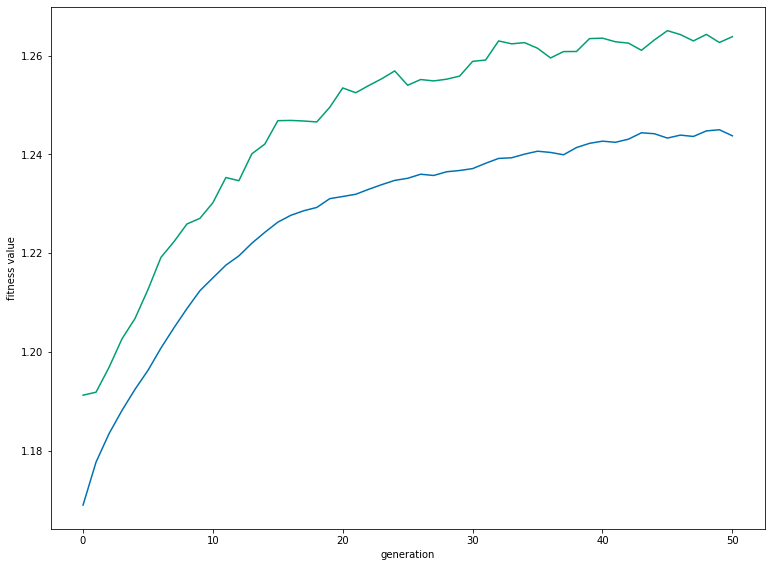

In [53]:
number_generations = 50
population_size = 1000
chromosome_length = 50

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-6/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-6.png')

In [54]:
chrom_best

array([[10699., 23009., 12283., ..., 25634., 17043., 11288.],
       [10425.,  9450., 11478., ...,    83., 25000.,  3091.],
       [24738., 18062., 13770., ...,  5942., 21987., 17051.],
       ...,
       [15251., 27581., 25536., ..., 25939., 24360., 25505.],
       [15770., 15775., 15251., ..., 18030.,  5011., 25939.],
       [10257., 16537., 16543., ..., 16379., 16382., 27052.]])

In [88]:
df = pandas.read_csv('data/processed/ga-results-6/gen-50.csv')
df

,Unnamed: 0,flag,lat_index,lon_index
0,10257,r,78,49
1,16537,r,125,211
2,16543,r,125,217
3,16546,r,125,220
4,16547,r,125,226
5,16548,r,125,227
6,16551,r,125,230
7,16658,r,126,189
8,16672,r,126,198
9,16688,r,126,206


In [89]:
uk = r_pd[0,:,:]

for j in range(len(latitude)):
    for k in range(len(longitude)):
        if np.isnan(uk[j,k]) == True:
            pass
        else:
            uk[j,k] = 0
            
            
            
for j in range(len(df)):
    uk[df.iloc[j]['lat_index'],df.loc[j]['lon_index']] = 10

In [90]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-6.nc')

In [91]:
ds = xr.open_dataset('data/processed/ga-6.nc')

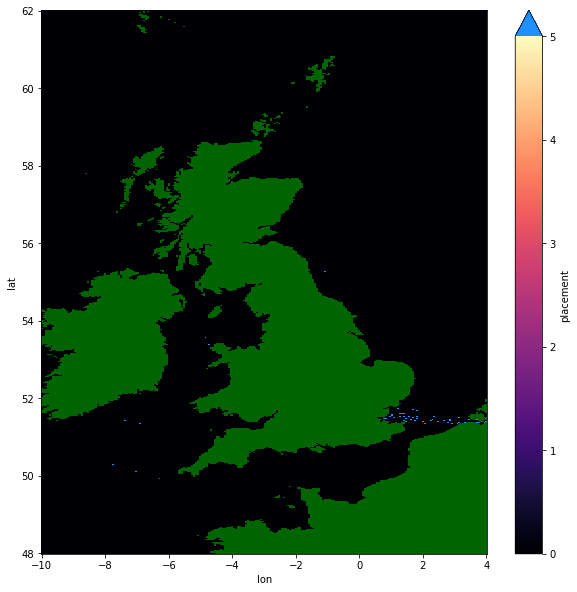

In [92]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

In [66]:
initial = pandas.read_csv('data/processed/ga-results-6/gen-0.csv')
initial

,Unnamed: 0,flag,lat_index,lon_index
0,10699,r,80,101
1,23009,r,210,94
2,12283,r,89,72
3,3546,r,40,71
4,17133,r,129,114
5,14132,r,103,54
6,13217,r,95,151
7,1350,r,25,67
8,11630,r,85,68
9,10895,r,81,98


In [68]:
f_best[-1]

1.2638582497152187

In [70]:
# uk = r_pd[0,:,:]

# for j in range(len(latitude)):
#     for k in range(len(longitude)):
#         if np.isnan(uk[j,k]) == True:
#             pass
#         else:
#             uk[j,k] = 0

# placement_xr = xr.Dataset({
#     'empty': xr.DataArray(
#         data=uk,
#         coords={'lat': latitude,
#                 'lon': longitude},
#         dims=['lat','lon'])})



# placement_xr.to_netcdf(path=f'data/processed/map.nc')

In [2]:
ds = xr.open_dataset('data/processed/map.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:  (lat: 519, lon: 232)
Coordinates:
  * lat      (lat) float32 48.0 48.03 48.05 48.08 ... 61.92 61.95 61.97 62.0
  * lon      (lon) float32 -10.0 -9.939 -9.879 -9.818 ... 3.818 3.879 3.939 4.0
Data variables:
    empty    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [3]:
r_space = ds.empty.values

In [4]:
thres = pandas.read_csv('data/processed/1e7.csv')
thres = thres[thres['flag']=='r']

In [86]:
thres.iloc[1000]

flag          r
lat_index    25
lon_index    73
Name: 1362, dtype: object

In [5]:
for j in range(len(thres)):
    r_space[thres.iloc[j]['lat_index'],thres.iloc[j]['lon_index']] = 10

In [6]:
placement_xr = xr.Dataset({
    'space': xr.DataArray(
        data=r_space,
        coords={'lat': ds.lat.values,
                'lon': ds.lon.values},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/range-search-space.nc')

In [7]:
ds = xr.open_dataset('data/processed/range-search-space.nc')

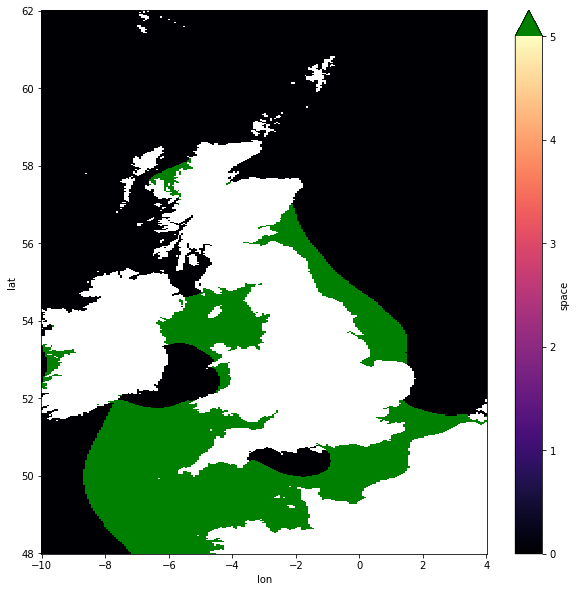

In [8]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('green')
cmap.set_bad('white')

ds.space.plot(size=10,aspect=1,vmax=5,cmap=cmap)  

In [9]:
thres = pandas.read_csv('data/processed/1e7.csv')
thres = thres[thres['flag']=='s']

In [10]:
ds = xr.open_dataset('data/processed/map.nc')
s_space = ds.empty.values

In [11]:
for j in range(len(thres)):
    s_space[thres.iloc[j]['lat_index'],thres.iloc[j]['lon_index']] = 10

In [12]:
placement_xr = xr.Dataset({
    'space': xr.DataArray(
        data=s_space,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/stream-search-space.nc')

In [13]:
ds = xr.open_dataset('data/processed/stream-search-space.nc')

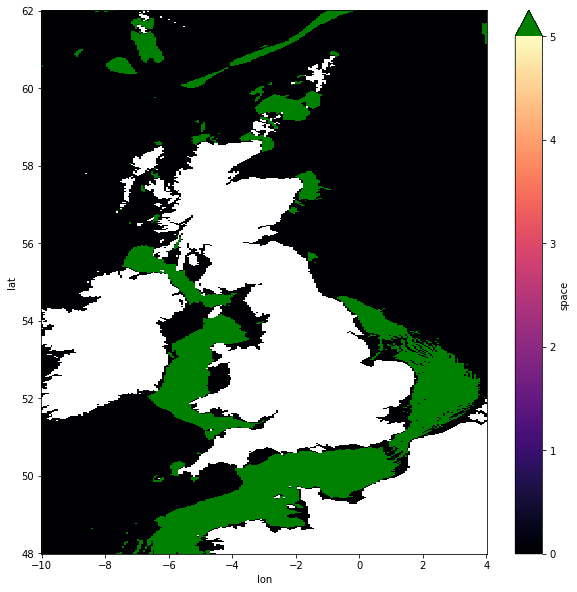

In [14]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('green')
cmap.set_bad('white')

ds.space.plot(size=10,aspect=1,vmax=5,cmap=cmap)  

In [2]:
not_nan

,flag,lat_index,lon_index
0,r,0,60
1,r,0,61
2,r,0,62
3,r,0,63
4,r,0,64
...,...,...,...
31504,s,518,160
31505,s,518,161
31506,s,518,162
31507,s,518,163


generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

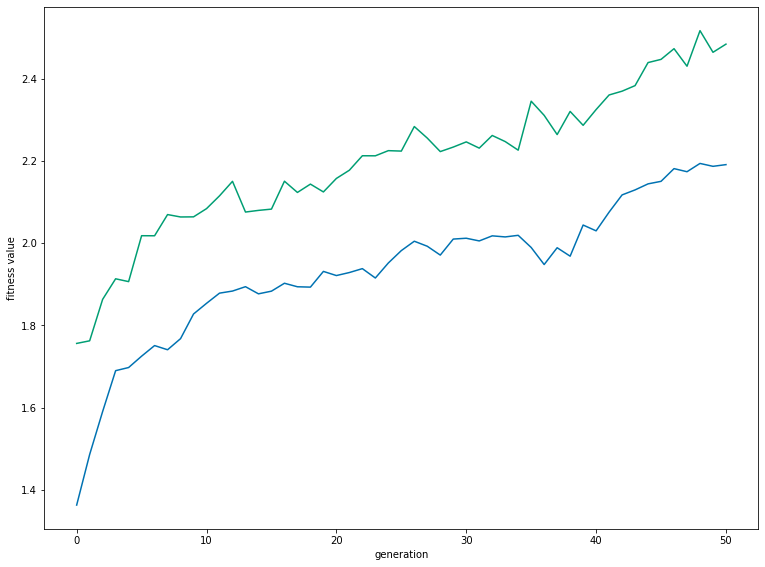

In [3]:
number_generations = 50
population_size = 100
chromosome_length = 50

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-7/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-7.png')

In [4]:
df = pandas.read_csv('data/processed/ga-results-7/gen-50.csv')
df

,Unnamed: 0,flag,lat_index,lon_index
0,16658,r,126,189
1,17048,r,129,46
2,20526,s,181,191
3,21386,s,193,199
4,21421,r,194,87
5,21491,r,195,113
6,21771,s,199,76
7,21821,s,199,175
8,22038,r,202,67
9,22357,s,204,180


In [6]:
not_nan.loc[16658]

flag           r
lat_index    126
lon_index    189
Name: 16658, dtype: object

In [7]:
range_list = []
stream_list = []

for i in df.index:
    if df.iloc[i,1] == 'r':
        range_list.append(df.iloc[i,0])

    elif df.iloc[i,1] == 's':
        stream_list.append(df.iloc[i,0])

In [9]:
range_coords = np.zeros((len(range_list),2),dtype=int)
stream_coords = np.zeros((len(stream_list),2),dtype=int)

range_coords[:,0] = np.array(not_nan.iloc[range_list,1])
range_coords[:,1] = np.array(not_nan.iloc[range_list,2])

stream_coords[:,0] = np.array(not_nan.iloc[stream_list,1])
stream_coords[:,1] = np.array(not_nan.iloc[stream_list,2])


for i in range(range_coords.shape[0]):
    if range_coords[i,0] in stream_coords[:,0]:
        idx = np.where(stream_coords[:,0]==range_coords[i,0])
        if range_coords[i,1] == stream_coords[idx,1]:
            print(range_coords[i,0],range_coords[i,1])
            
        

In [10]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values

for j in range(range_coords.shape[0]):
    uk[range_coords[j,0],range_coords[j,1]] = 10
    
for k in range(stream_coords.shape[0]):
    uk[stream_coords[k,0],stream_coords[k,1]] = -10

In [11]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-7.nc')

In [12]:
ds = xr.open_dataset('data/processed/ga-7.nc')

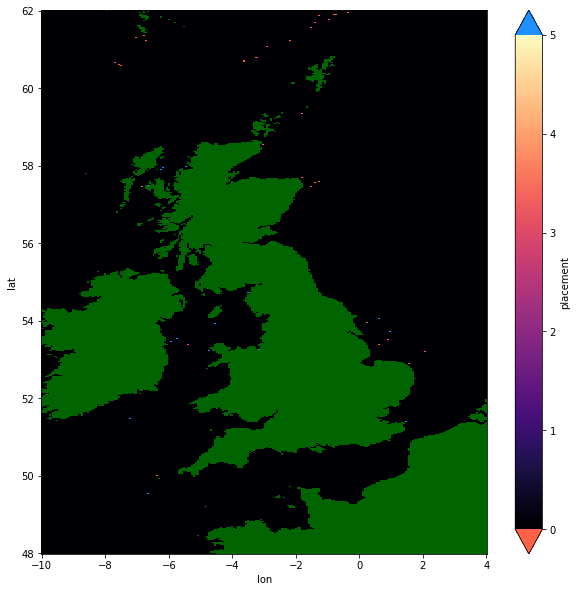

In [13]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

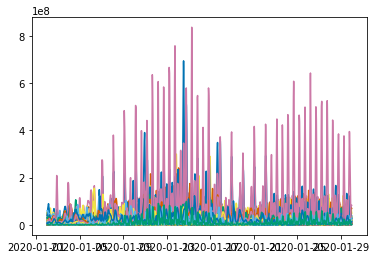

In [23]:
sol_power = 0
plt.figure()
for i in range(range_coords.shape[0]):
    curve = r_power[:,range_coords[i,0],range_coords[i,1]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'r,{range_coords[i]}')
    
for j in range(stream_coords.shape[0]):
    curve = s_power[:,stream_coords[j,0],stream_coords[j,1]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f's,{stream_coords[j]}')
    

    
# plt.legend()
    

(0.0, 3000000000.0)

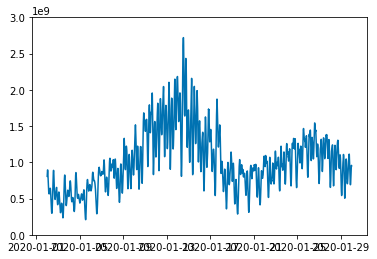

In [16]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
plt.ylim([0,3e9])

In [17]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
sol_mean/rmsd

2.4848198135204878

In [18]:
f_best[-1]

2.4848198135204878

In [12]:
ds_range_mean = xr.open_dataset('data/processed/range-mean-power.nc')

In [13]:
n = 20
av_range = ds_range_mean.power.values
max_idx = np.zeros((n,2),dtype=int)
for i in range(n):
    av_max = np.max(av_range[av_range>0])
    max_idx[i,0] = np.where(av_range==av_max)[0][0]
    max_idx[i,1] = np.where(av_range==av_max)[1][0]
    av_range[max_idx[i,0],max_idx[i,1]] = np.nan


In [14]:
max_idx

array([[136, 122],
       [135, 122],
       [134, 122],
       [133, 121],
       [132, 120],
       [131, 120],
       [130, 120],
       [131, 119],
       [130, 119],
       [131, 118],
       [130, 118],
       [129, 118],
       [128, 118],
       [130, 117],
       [129, 117],
       [ 24, 141],
       [128, 117],
       [131, 116],
       [130, 116],
       [ 24, 140]])

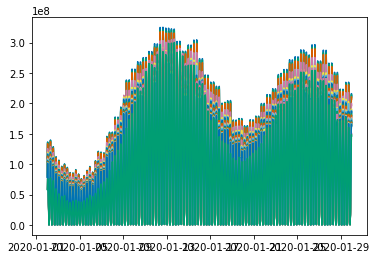

In [15]:
sol_power = 0
plt.figure()
for i in range(max_idx.shape[0]):
    curve = r_power[:,max_idx[i,0],max_idx[i,1]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'r,{max_idx[i]}')
    
# plt.legend()

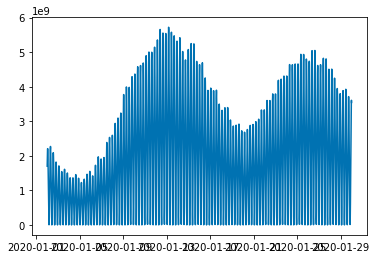

In [16]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.yscale('log')
# plt.ylim([0,1e5])

In [19]:
### new figure of merit
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
(sol_mean**2)/rmsd

2249072333.187904

In [45]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values

for j in range(max_idx.shape[0]):
    uk[max_idx[j,0],max_idx[j,1]] = 10
    


In [46]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-theo-range-dep.nc')

In [48]:
ds = xr.open_dataset('data/processed/ga-theo-range-dep.nc')

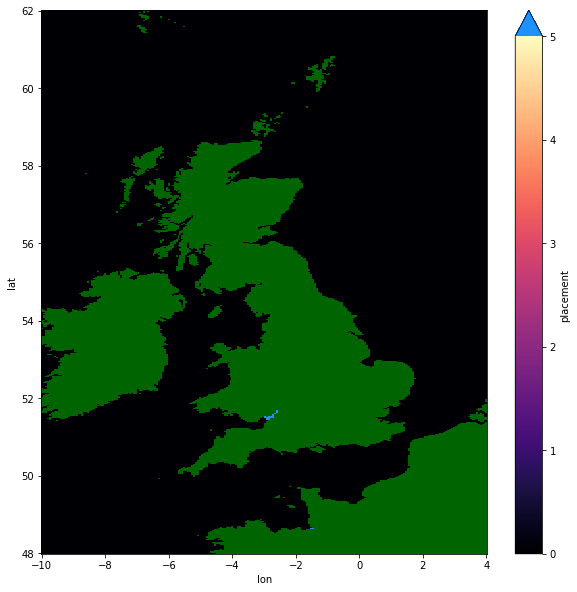

In [49]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

In [2]:
not_nan

,flag,lat_index,lon_index
0,r,0,60
1,r,0,61
2,r,0,62
3,r,0,63
4,r,0,64
...,...,...,...
29100,r,386,80
29106,r,387,80
29107,r,387,81
29114,r,388,80


In [ ]:
number_generations = 50
population_size = 1000
chromosome_length = 50

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-8/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-8.png')

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done


generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

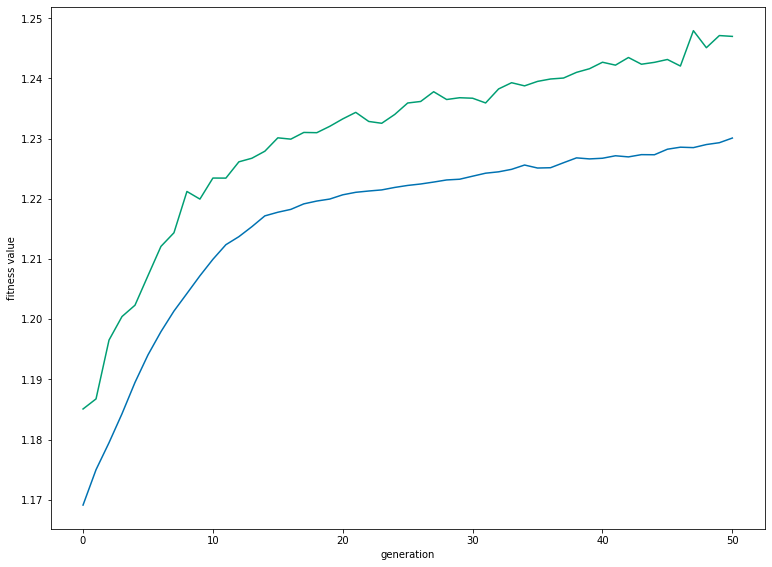

In [2]:
number_generations = 50
population_size = 1000
chromosome_length = 100

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-8/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-8.png')

In [14]:
df = pandas.read_csv('data/processed/ga-results-8/gen-50.csv')
df

,Unnamed: 0,flag,lat_index,lon_index
0,7092,r,62,155
1,14097,r,102,183
2,15133,r,114,193
3,15152,r,114,205
4,15330,r,116,196
...,...,...,...,...
95,20757,r,185,172
96,23924,r,218,78
97,25440,r,236,78
98,26080,r,244,104


In [4]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df)):
    uk[df.iloc[j]['lat_index'],df.loc[j]['lon_index']] = 10

In [5]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-8.nc')

In [6]:
ds = xr.open_dataset('data/processed/ga-8.nc')

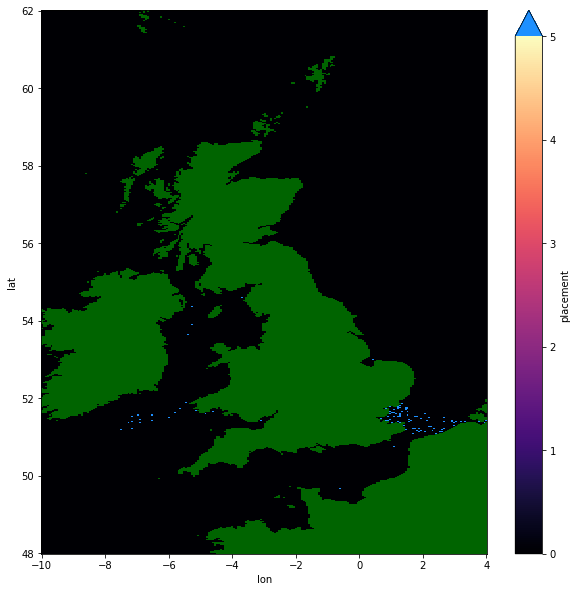

In [7]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

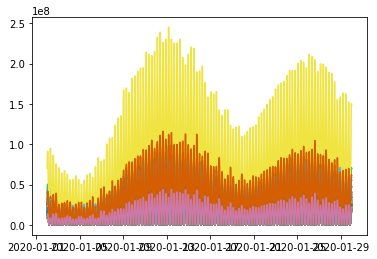

In [15]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = r_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    

# plt.legend()
    

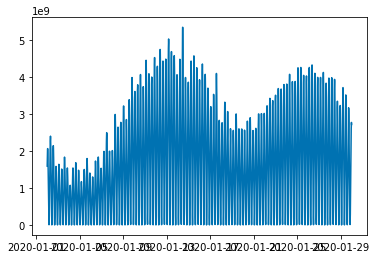

In [16]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.yscale('log')
# plt.ylim([0,1e5])

In [24]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
sol_mean/rmsd

1.2469941009067576

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

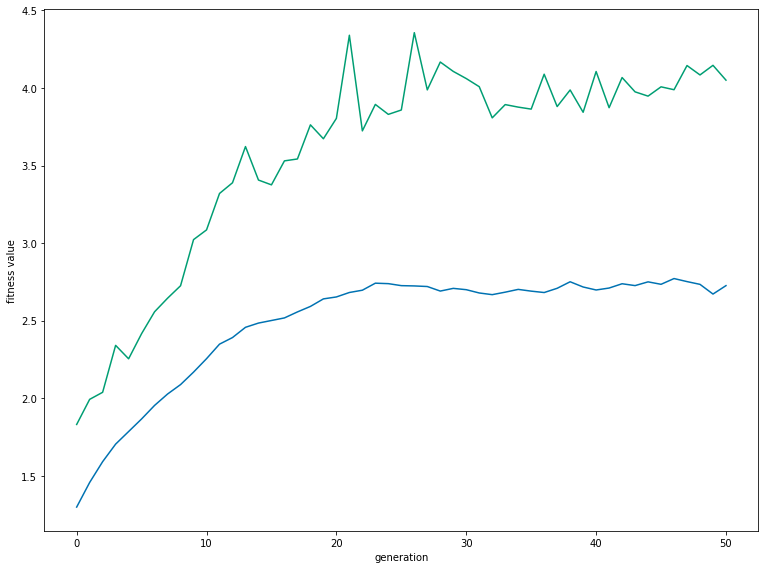

In [3]:
number_generations = 50
population_size = 1000
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-9/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-9.png')

In [17]:
df = pandas.read_csv('data/processed/ga-results-9/gen-50.csv')
df

,Unnamed: 0,flag,lat_index,lon_index
0,27526,s,284,46
1,31362,s,510,145
2,31413,s,514,149
3,28593,s,351,136
4,30284,s,463,47
5,30535,s,473,109
6,30666,s,478,19
7,30689,s,478,117
8,4382,s,45,117
9,21740,s,198,177


In [6]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df)):
    uk[df.iloc[j]['lat_index'],df.loc[j]['lon_index']] = -10

In [7]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-9.nc')

In [8]:
ds = xr.open_dataset('data/processed/ga-9.nc')

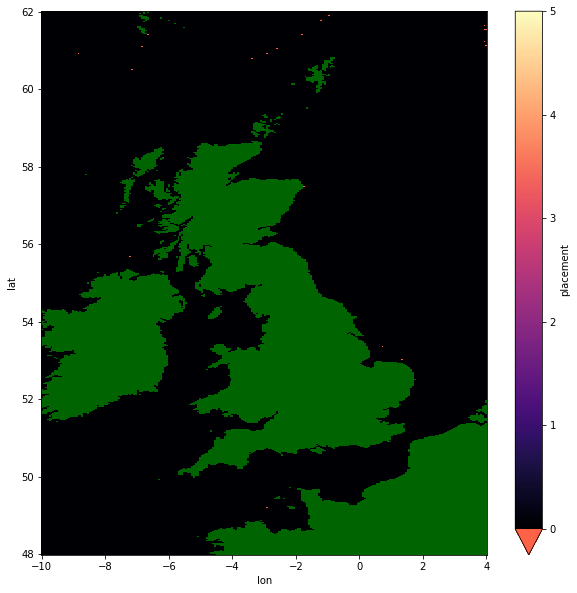

In [9]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

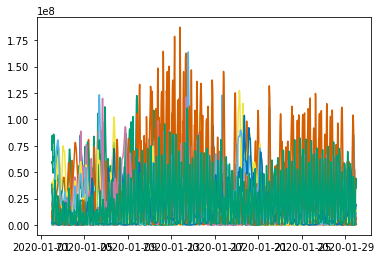

In [18]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = s_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    

# plt.legend()
    

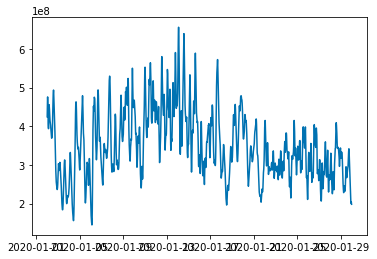

In [20]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.yscale('log')
# plt.ylim([0,1e5])

In [21]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
sol_mean/rmsd

4.050170411968448

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

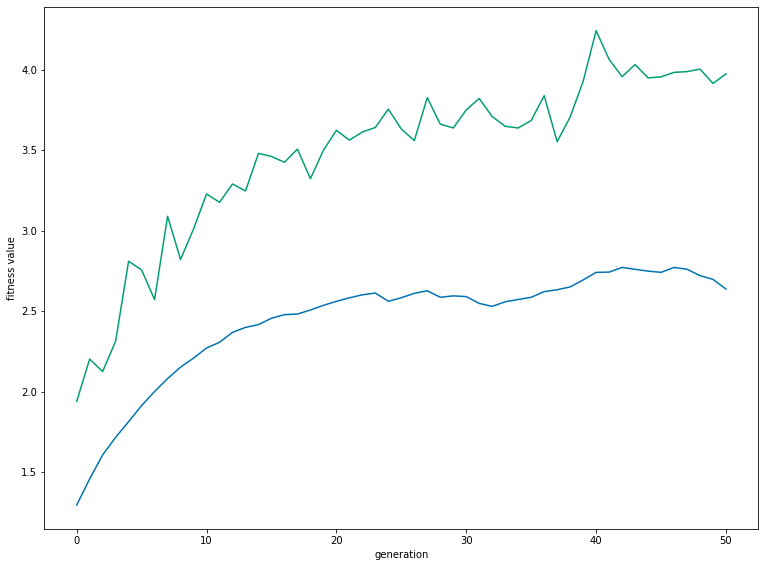

In [23]:
number_generations = 50
population_size = 1000
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-10/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-10.png')

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

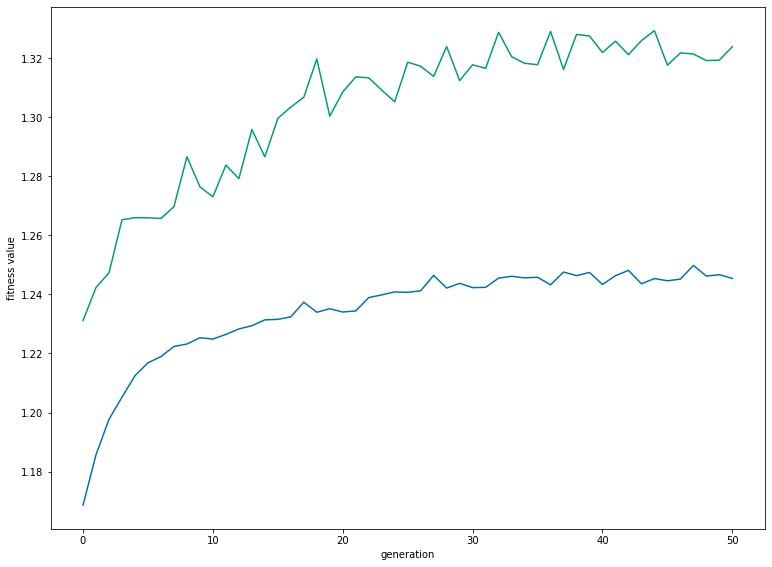

In [3]:
number_generations = 50
population_size = 1000
chromosome_length = 5

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-11/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-11.png')

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

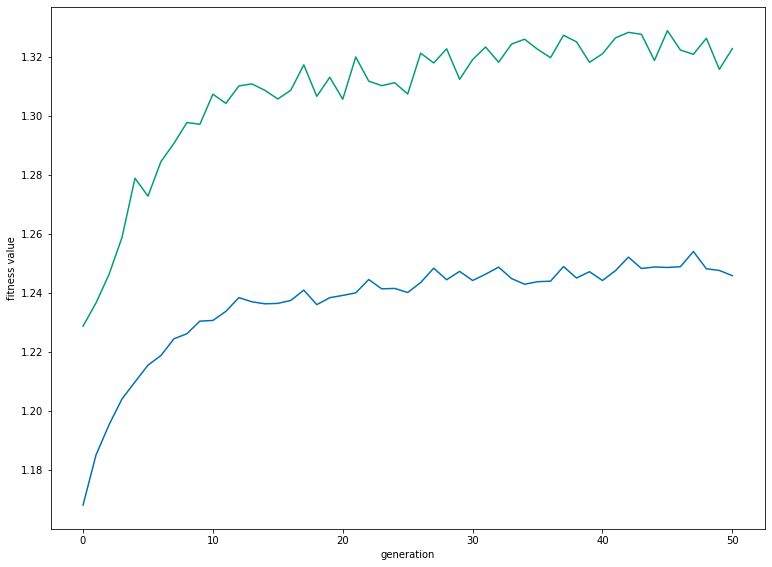

In [4]:
number_generations = 50
population_size = 1000
chromosome_length = 5

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-12/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.savefig('figures/ga-convergence-12.png')

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

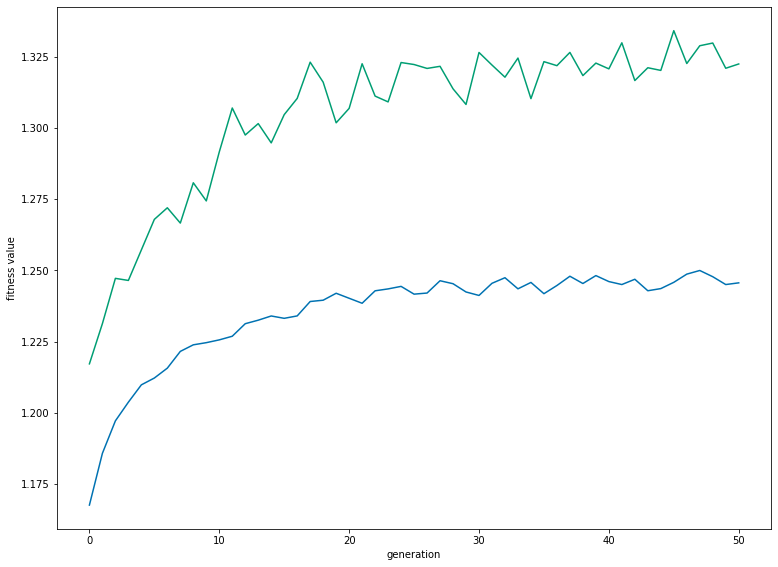

In [5]:
number_generations = 50
population_size = 1000
chromosome_length = 5

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-13/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.legend(loc='bottom right')
plt.savefig('figures/ga-convergence-13.png')

In [ ]:
### run just for stream next
### run ga for stream with already optimised range and vice versa
### maybe change fitness to rms/rmsd instead of mean/rmsd <-- no